In [1]:
# Default Arguments 
save_figures = True
output_dir = "../test/"
input_file = "../data/plot_data.json"
model_results = "../data/test.csv"

In [2]:
# Parameters
model_results = "test.csv"
output_dir = "../test/"


In [3]:
# Setup -- Make sure to execute this block to enable thresholding tool
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
plt.style.use('ggplot')
with open(input_file, 'r') as f:
    plot_dict = json.load(f)
results = pd.read_csv(model_results)

# Model Metrics

The following graphs have been automatically generated

## AUROC (Area Under Receiver Operating Characteristic) 

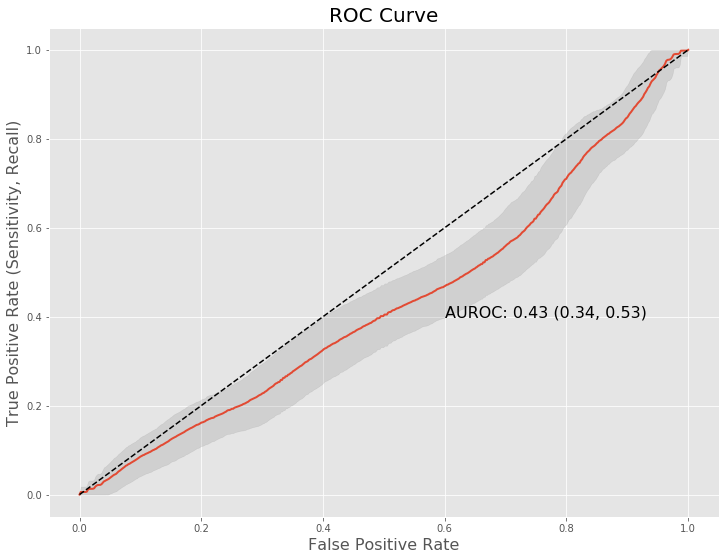

In [4]:
plt.figure(figsize=(12, 9));
plt.plot(plot_dict['ROC']['mean_fpr'], plot_dict['ROC']['mean_tpr'], linewidth = 2);
plt.fill_between(plot_dict['ROC']['mean_fpr'], plot_dict['ROC']['tprs_lower'], plot_dict['ROC']['tprs_upper'], color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.');
plt.title('ROC Curve', size = 20); plt.plot([0, 1], [0, 1], 'k--'); 
plt.annotate('AUROC: {:.2f} ({:.2f}, {:.2f})'.format(plot_dict['ROC']['auc'], plot_dict['ROC']['auc_lower_bound'], plot_dict['ROC']['auc_upper_bound']), [0.6, 0.4], fontsize = 16); plt.ylabel('True Positive Rate (Sensitivity, Recall)', size = 16); plt.xlabel('False Positive Rate', size = 16)
if save_figures: plt.savefig(output_dir + 'auroc.png')
plt.show()

# Class Probabilities

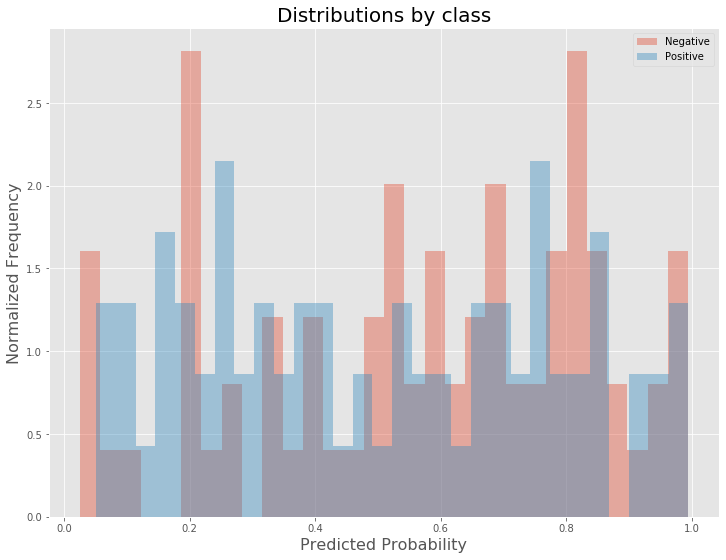

In [5]:
plt.figure(figsize=(12, 9));sns.distplot(results.iloc[results.iloc[:, 0].values == 0, 1], kde = False, norm_hist = True, label = "Negative", bins = 30);sns.distplot(results.iloc[results.iloc[:, 0].values == 1, 1], kde = False, norm_hist = True, label = "Positive", bins = 30);plt.legend();plt.title("Distributions by class", size = 20);plt.xlabel("Predicted Probability", size = 16);plt.ylabel("Normalized Frequency", size = 16)
if save_figures: plt.savefig(output_dir + 'class_probabilities.png')
plt.show()

## Positive Predictive Value by Decile

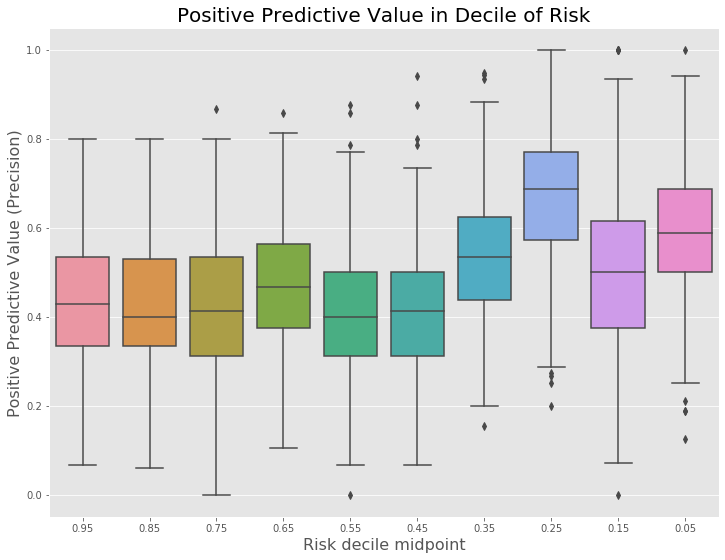

In [6]:
plt.figure(figsize=(12, 9));sns.boxplot([1 - x for x in plot_dict['pid']['decile_midpoint']], plot_dict['pid']['pid']);plt.xticks(range(10), [0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05]);plt.title('Positive Predictive Value in Decile of Risk', size = 20);plt.xlabel('Risk decile midpoint', size = 16);plt.ylabel('Positive Predictive Value (Precision)', size = 16)
if save_figures: plt.savefig(output_dir + 'ppv_decile.png')
plt.show()


##  Precision @ k

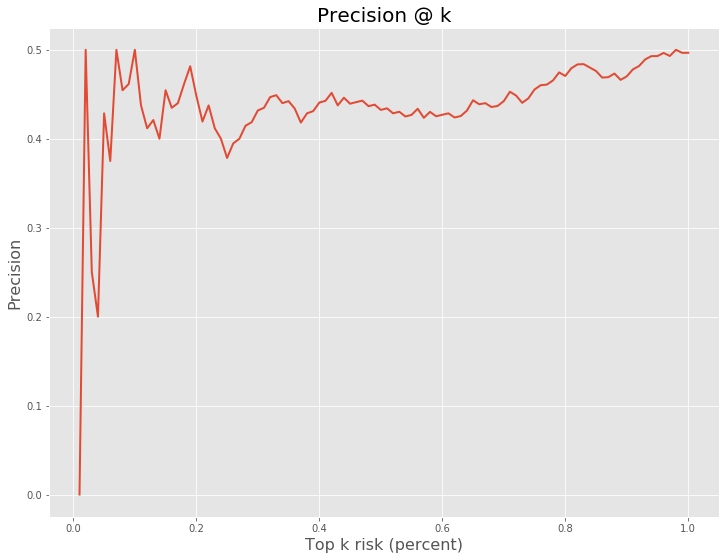

In [7]:
plt.figure(figsize=(12, 9));plt.plot(plot_dict['precision_at_k']['cutpoints'], plot_dict['precision_at_k']['precision_at_k'], linewidth = 2);plt.title('Precision @ k', size = 20);plt.ylabel('Precision', size = 16);plt.xlabel('Top k risk (percent)', size = 16)
if save_figures: plt.savefig(output_dir + 'precision_at_k.png')
plt.show()

# Precision-Recall 

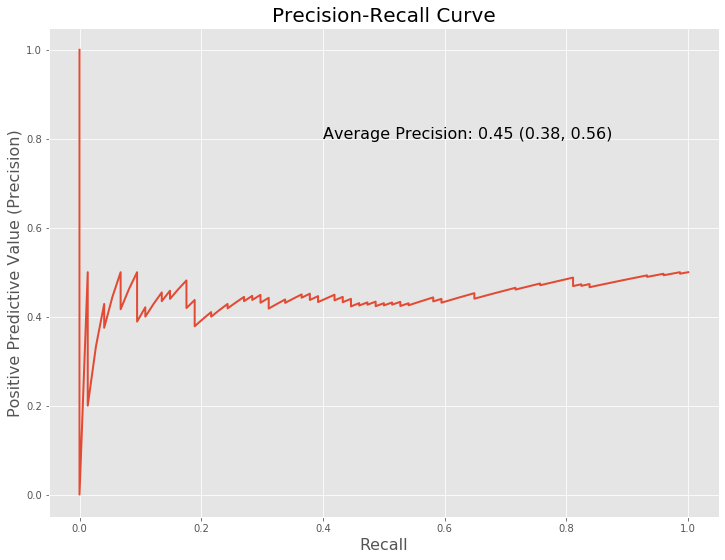

In [8]:
plt.figure(figsize=(12, 9));plt.plot(plot_dict['avg_precision']['recall'], plot_dict['avg_precision']['precision'], linewidth = 2);plt.title('Precision-Recall Curve', size = 20);plt.annotate('Average Precision: {:.2f} ({:.2f}, {:.2f})'.format(plot_dict['avg_precision']['avg_precision'], plot_dict['avg_precision']['avg_precision_lower_bound'], plot_dict['avg_precision']['avg_precision_upper_bound']), [0.4, 0.8], fontsize = 16);plt.ylabel('Positive Predictive Value (Precision)', size = 16);plt.xlabel('Recall', size = 16)
if save_figures: plt.savefig(output_dir + 'precision_recall.png')
plt.show()

# Calibration

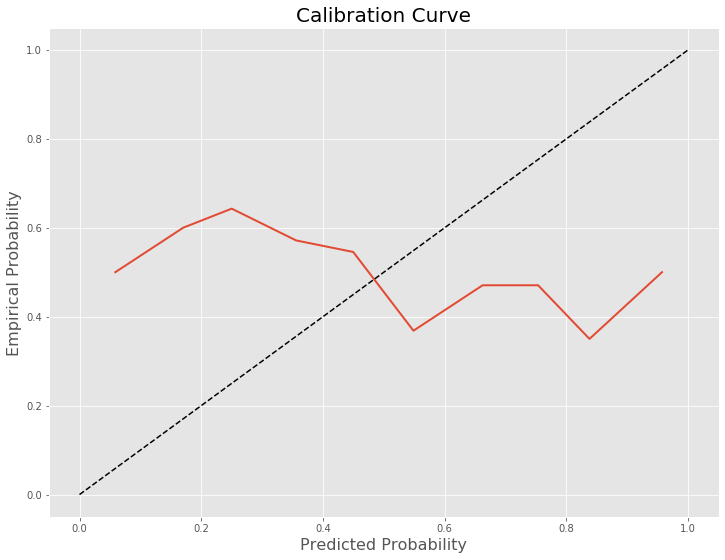

In [9]:
plt.figure(figsize=(12, 9));plt.plot(plot_dict['calibration']['prob_pred'], plot_dict['calibration']['prob_true'], linewidth = 2);plt.title('Calibration Curve', size = 20);plt.plot([0, 1], [0, 1], 'k--');plt.ylabel('Empirical Probability', size = 16);plt.xlabel('Predicted Probability', size = 16)
if save_figures: plt.savefig(output_dir + 'calibration.png')
plt.show()

# Thresholding 

In [10]:
def _generate_confusion_matrix(true, pred, threshold):
    true_series = pd.Series(true, name = 'True Label')
    pred_series = pd.Series([1 if x > threshold else 0 for x in pred], name = 'Predicted Label')
    return pd.crosstab(true_series, pred_series)

def _get_metrics(confusion_matrix):
    tp = confusion_matrix.loc[1,1]
    fp = confusion_matrix.loc[0, 1]
    tn = confusion_matrix.loc[0, 0]
    fn = confusion_matrix.loc[1, 0]
    prevalence = (tp + fn) / (tp + fp + tn + fn)
    sensitivity = tp / (tp + fn)
    specificity  = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    
    return tp, fp, tn, fn, prevalence, sensitivity, specificity, ppv, npv

true = results.iloc[:, 0]
pred = results.iloc[:, 1]

def print_metrics(threshold = 0.5):
    # Confusion_matrix
    print("Confusion Matrix at Threshold of {:.4f}".format(threshold))
    print("\n")
    conf_mat = _generate_confusion_matrix(true, pred, threshold)
    print(conf_mat)
    tp, fp, tn, fn, prevalence, sensitivity, specificity, ppv, npv = _get_metrics(conf_mat)
    print("\n")
    print("=====================")
    print("Metrics:")
    print("=====================")
    print("Prevalence of Outcome: {:.4f}".format(prevalence))
    print("Sensitivity / Recall / True Positive Rate: {:.4f}".format(sensitivity))
    print("Specificity / True Negative Rate: {:.4f}".format(specificity))
    print("Positive predictive Value / Precision: {:.4f}".format(ppv))
    print("Negative Predictive Value: {:.4f}".format(npv))
    pass

In [11]:
interact(print_metrics, threshold = (0.01, 0.99, 0.01))

Confusion Matrix at Threshold of 0.5000


Predicted Label   0   1
True Label             
0                27  50
1                37  37


Metrics:
Prevalence of Outcome: 0.4901
Sensitivity / Recall / True Positive Rate: 0.5000
Specificity / True Negative Rate: 0.3506
Positive predictive Value / Precision: 0.4253
Negative Predictive Value: 0.4219


<function __main__.print_metrics(threshold=0.5)>